# Python para Geociencias

### Víctor Rojas
#### vr.rojaspozo@gmail.com

Esto es parte de las notas de [**Python para Geociencias**](https://github.com/vrrp/Workshop2018Python)  

# 13. Procesamiento y visualización de datos en formato grib2
En esta lección se requiere contar con los paquetes de **numpy, matplotlib, basemap** y **pygrib**. Para instalar **pygrib**, ejecutar la siguiente instrucción en un terminal.

**conda install -c conda-forge pygrib**
El archivo de datos en formato **grib2** que usaremos se encuentra en el directorio **data**.
Acontinuación se inicia explorando la estructura del archivo **wnd850_f.01.2005081912.2005100312.2005081912.grb2**.
Estos datos fueron tomados de:

https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs

In [23]:
import pygrib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import matplotlib.pyplot as plt


In [24]:
grib_file = "./data/wnd850_f.01.2005081912.2005100312.2005081912.grb2"

gribData = pygrib.open(grib_file)

In [33]:
for ivar in  gribData:
	print(ivar)
print('\n')

#grb = grbs.select(name = 'Clear air turbulence (CAT)')[0]
grb = gribData.select(name = "U component of wind")[0]
u = grb.values
grb = gribData.select(name = "V component of wind")[0]
v = grb.values
lats, ulons = grb.latlons()

uudata,lons = shiftgrid(180.,u,ulons[0,:],start=False)
vvdata,lons = shiftgrid(180.,v,ulons[0,:],start=False)


1:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 6 hrs:from 200508191200
2:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 6 hrs:from 200508191200
3:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 12 hrs:from 200508191200
4:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 12 hrs:from 200508191200
5:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 18 hrs:from 200508191200
6:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 18 hrs:from 200508191200
7:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 24 hrs:from 200508191200
8:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 24 hrs:from 200508191200
9:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 85000 Pa:fc

In [34]:
print(lons)

[-180. -179. -178. -177. -176. -175. -174. -173. -172. -171. -170. -169.
 -168. -167. -166. -165. -164. -163. -162. -161. -160. -159. -158. -157.
 -156. -155. -154. -153. -152. -151. -150. -149. -148. -147. -146. -145.
 -144. -143. -142. -141. -140. -139. -138. -137. -136. -135. -134. -133.
 -132. -131. -130. -129. -128. -127. -126. -125. -124. -123. -122. -121.
 -120. -119. -118. -117. -116. -115. -114. -113. -112. -111. -110. -109.
 -108. -107. -106. -105. -104. -103. -102. -101. -100.  -99.  -98.  -97.
  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.
  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.
  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.
  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.
  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.
  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.
  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -

(181, 360)
0.0640312423743 45.5290149246


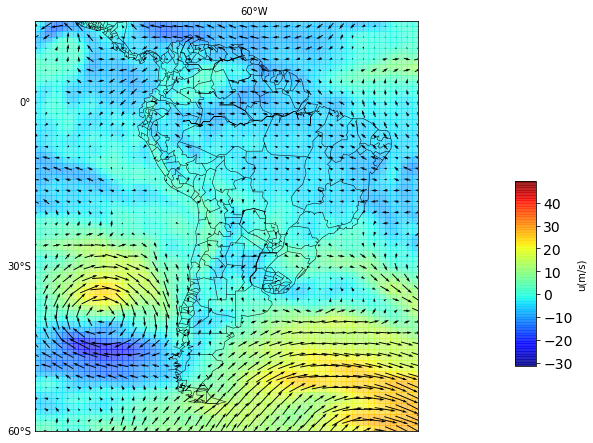

In [49]:
"""
m = Basemap(projection='cyl',
            llcrnrlat = lats.min(),
            urcrnrlat= lats.max(),
            llcrnrlon=lons.min(),
            urcrnrlon=lons.max(),
            resolution='c')
"""
m = Basemap(projection='cyl',
            llcrnrlat = -60,
            urcrnrlat= 15,
            llcrnrlon=-100,
            urcrnrlon=-30,
            resolution='c')

x, y = m(*np.meshgrid(lons, lats[:,0]))

yy = np.arange(0, y.shape[0], 2)
xx = np.arange(0, x.shape[1], 2)
points = np.meshgrid(yy, xx)

U = uudata; V = vvdata; DATA = U
print(U.shape)
xp = x[points]
yp = y[points]
up = U[points]
vp = V[points]

mag = np.sqrt(up*up+vp*vp)
print(np.min(mag), np.max(mag))
fig = plt.figure(figsize=(10,6))
ax =fig.add_axes([0.08,0.08,0.78,0.95])

pcm = m.pcolormesh(x,y, DATA, alpha=0.6, shading='flat',cmap=plt.cm.jet)

q = m.quiver(x[points], y[points], U[points], V[points], angles='xy', scale=450,  pivot='mid', color="k")

labelColor = "b"
m.drawcountries(linewidth=0.5, linestyle='solid',color="k")
m.drawstates()
m.drawcoastlines(linewidth=0.5, linestyle='solid',color="k")
m.drawmeridians(np.arange(int(lons.min()),int(lons.max()),60), labels=[0,1,1,0],linewidth=0.1, color=labelColor,fontsize=10)
m.drawparallels(np.arange(int(lats.min()),int(lats.max()),30), labels=[1,0,0,0],linewidth=0.1, color=labelColor,fontsize=10)

ax_cbar = fig.add_axes([0.87, 0.23, 0.03, 0.43])
cbar = plt.colorbar(pcm,cax=ax_cbar, orientation='vertical')
cbar.set_label("u(m/s)")
cbar.ax.tick_params(labelsize=14)

plt.savefig("./graficos/wind-gfs1.png")
plt.show()